## Approach for relationship extraction in unstructured text
##### Supervised technique (source: https://www.nltk.org/book/ch07.html)
* Goal: Building relationship tuples _(entity, relation, entity)_

### Pipeline architecture

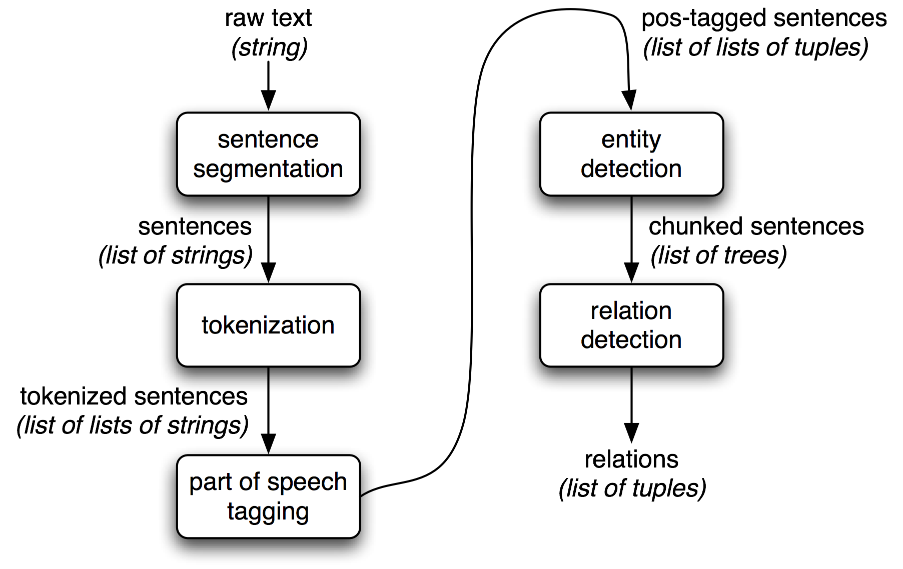

In [1]:
import spacy
import re
import nltk
import os
import pprint

from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
nlp = spacy.load('de_core_news_sm')
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [90]:
utterance = u'''Meine kleine Enkelin Lisa und mein Enkel Lukas fliegen morgen nach London. Sie sind zum ersten Mal in England. 
Peter und Maria gehen morgen ins Kino. Ich und mein Sohn gehen heute zum Fußball. 
Ich gehe mit Johann in den Zoo.'''

In [91]:
text_long = u'''Meine Enkelin Lisa und mein Enkel Lukas fliegen morgen nach London. Sie sind zum ersten Mal in England. 
Ich bin geboren zu York im Jahre 1632, als Kind angesehener Leute, die ursprünglich nicht aus jener Gegend stammten. 
Mein Vater, ein Ausländer, aus Bremen gebürtig, hatte sich zuerst in Hull niedergelassen, war dort als Kaufmann zu 
hübschem Vermögen gekommen und dann, nachdem er sein Geschäft aufgegeben hatte, nach York gezogen. 
Hier heiratete er meine Mutter, eine geborene Robinson.
Ich hatte zwei ältere Brüder. Der eine von ihnen, welcher als Oberstleutnant bei einem englischen, 
früher von dem berühmten Oberst Lockhart befehligten Infanterieregiment in Flandern diente, 
fiel in der Schlacht bei Dünkirchen. Was aus dem jüngeren geworden ist, habe ich ebenso wenig in Erfahrung bringen können, 
als meine Eltern je Kenntnisse von meinen eignen Schicksalen erhalten haben.'''

### Sentence Segmentation
##### output: sentences (list of strings)

In [92]:
sentences = sent_tokenize(utterance)
sentences

['Meine kleine Enkelin Lisa und mein Enkel Lukas fliegen morgen nach London.',
 'Sie sind zum ersten Mal in England.',
 'Peter und Maria gehen morgen ins Kino.',
 'Ich und mein Sohn gehen heute zum Fußball.',
 'Ich gehe mit Johann in den Zoo.']

### Tokenization
##### output: tokenized sentences (list of lists of strings)

In [93]:
tokenized_sentences = []
for sentence in sentences:
    sentence = re.sub(r'\W', ' ', sentence)  # remove non-word characters
    tokenized_sentences.append(word_tokenize(sentence))
    
tokenized_sentences

[['Meine',
  'kleine',
  'Enkelin',
  'Lisa',
  'und',
  'mein',
  'Enkel',
  'Lukas',
  'fliegen',
  'morgen',
  'nach',
  'London'],
 ['Sie', 'sind', 'zum', 'ersten', 'Mal', 'in', 'England'],
 ['Peter', 'und', 'Maria', 'gehen', 'morgen', 'ins', 'Kino'],
 ['Ich', 'und', 'mein', 'Sohn', 'gehen', 'heute', 'zum', 'Fußball'],
 ['Ich', 'gehe', 'mit', 'Johann', 'in', 'den', 'Zoo']]

### Tokenization & POS Tagging
##### output: pos-tagged sentences (list of lists of tuples)

### spaCy POS Tagging

In [94]:
#utterance = re.sub(r'.', ' ', utterance)  # remove non-word characters
#doc = nlp(utterance)

pos_tagged_sentences = []

for sentence in sentences:
    doc = nlp(sentence)
    
    pos_tagged_sentence = []
    for token in doc:
        pos_tuple = (token.text, token.pos_)
        pos_tagged_sentence.append(pos_tuple)
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        #      token.shape_, token.is_alpha, token.is_stop)
    pos_tagged_sentences.append(pos_tagged_sentence)
    
pos_tagged_sentences
    

[[('Meine', 'DET'),
  ('kleine', 'ADJ'),
  ('Enkelin', 'NOUN'),
  ('Lisa', 'PROPN'),
  ('und', 'CONJ'),
  ('mein', 'DET'),
  ('Enkel', 'NOUN'),
  ('Lukas', 'PROPN'),
  ('fliegen', 'VERB'),
  ('morgen', 'ADV'),
  ('nach', 'ADP'),
  ('London', 'PROPN'),
  ('.', 'PUNCT')],
 [('Sie', 'PRON'),
  ('sind', 'AUX'),
  ('zum', 'ADP'),
  ('ersten', 'ADJ'),
  ('Mal', 'NOUN'),
  ('in', 'ADP'),
  ('England', 'PROPN'),
  ('.', 'PUNCT')],
 [('Peter', 'PROPN'),
  ('und', 'CONJ'),
  ('Maria', 'PROPN'),
  ('gehen', 'VERB'),
  ('morgen', 'ADV'),
  ('ins', 'ADP'),
  ('Kino', 'NOUN'),
  ('.', 'PUNCT')],
 [('Ich', 'PRON'),
  ('und', 'CONJ'),
  ('mein', 'DET'),
  ('Sohn', 'NOUN'),
  ('gehen', 'VERB'),
  ('heute', 'ADV'),
  ('zum', 'ADP'),
  ('Fußball', 'NOUN'),
  ('.', 'PUNCT')],
 [('Ich', 'PRON'),
  ('gehe', 'VERB'),
  ('mit', 'ADP'),
  ('Johann', 'PROPN'),
  ('in', 'ADP'),
  ('den', 'DET'),
  ('Zoo', 'NOUN'),
  ('.', 'PUNCT')]]

### Stanford POS Tagging

In [13]:
from nltk.tag import StanfordPOSTagger

java_path = "C:\\Program Files\\Java\\jdk1.8.0_181\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

path_to_model = "../models/german-fast.tagger"
path_to_jar = "../models/stanford-postagger.jar"
tagger = StanfordPOSTagger(path_to_model, path_to_jar)
tagger.java_options='-mx4096m'  ### Setting higher memory limit for long sentences

pos_tagged_sentences = []
for sentence in tokenized_sentences:
    pos_tagged_sentences.append(tagger.tag(sentence))

pos_tagged_sentences


c:\program files\python\lib\site-packages\nltk\tag\stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


[[('Wie', 'PWAV'),
  ('hoch', 'ADJD'),
  ('ist', 'VAFIN'),
  ('das', 'ART'),
  ('Kindergeld', 'NN'),
  ('2018', 'CARD')]]

### Entity Detection
##### -> output: chunked sentences (list of trees)
Use chunking: segment and label multi-token sequences (see image below)

From inside out: _word tokens_, _POS tags_, _chunks_ (more specific _noun phrase chunks_ or _NP-chunks_)

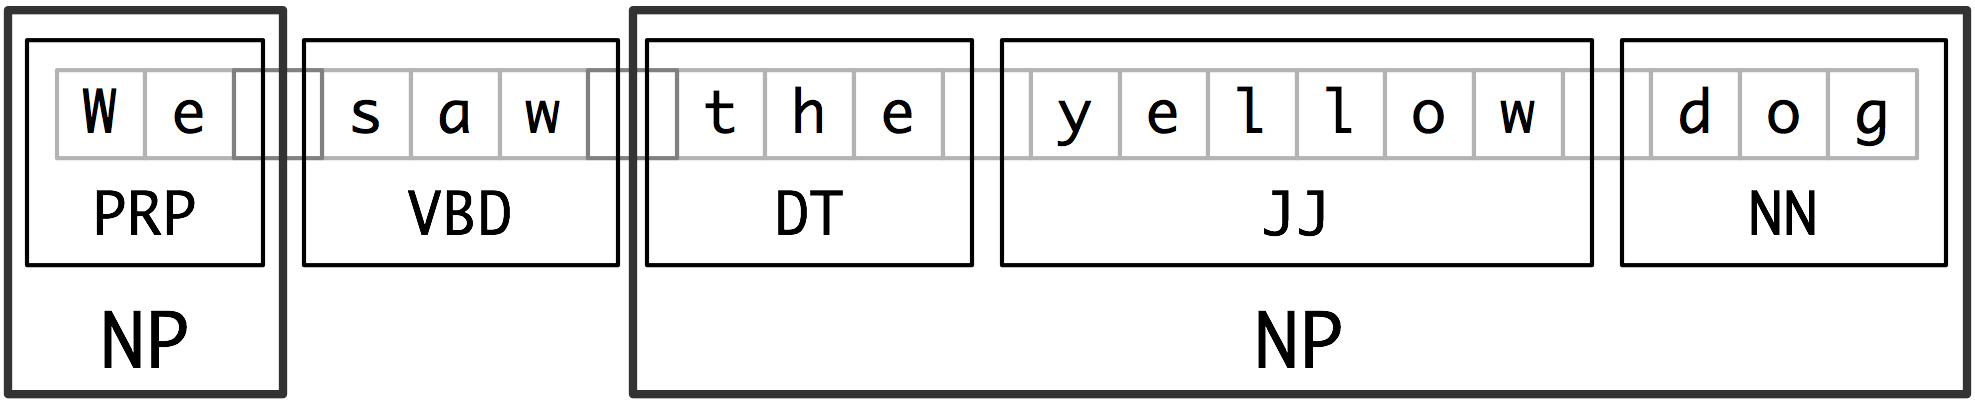

### Create a chunk-parser

Import Ghostscript for printing the parese tree

In [95]:
path_to_gs = "C:/Program Files/gs/gs9.25/bin"
os.environ['PATH'] += os.pathsep + path_to_gs

#### Define the grammar



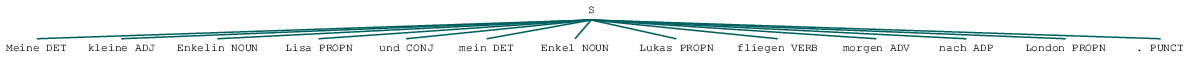

In [96]:
nltk.ne_chunk(pos_tagged_sentences[0])

In [116]:
# NLTK POS tags
# optional determinder followed by any number of adjectives and then a noun
#grammar = "NP: {<DT>?<JJ>*<NN>}"  

# spaCy POS Tags
#grammar = "NP: {<DET>?<ADJ>*<PROPN>}"
#grammar = "REL: {<NOUN|PROPN>+<CONJ>?<DET>?<VERB><ADV>?<ADJ>?<ADP>?<NOUN|PROPN>}"
grammar = r"""CHUNK: {<DET><ADJ>?<CONJ>?<DET>?<NOUN|PROPN>+}
                   {<PRON><VERB><ADP><NOUN|PROPN>}
                   {<PRON><CONJ>?.*<NOUN|PROPN>}"""

# Stanford NLP POS tags
#grammar = r"""NP: {<PPOSAT><NN>|<NN><NE>|<APPR><NE>|<APPR><PDAT><NN>}"""
#grammar = r"""NP: {<PPOSAT>?<ADJ>*<NE>}"""

# Relation followed by a named entity
#grammar = r"""CHUNK: {<NN><NE>}
#                   {<VVFIN>}"""

In [117]:
chunk_parser = nltk.RegexpParser(grammar)

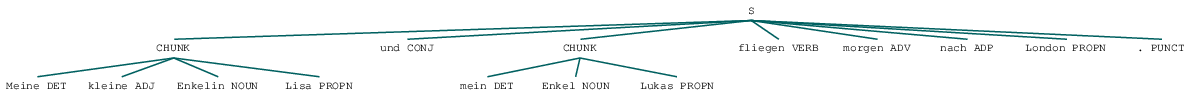

In [112]:
chunk_parser.parse(pos_tagged_sentences[0])

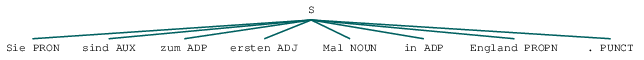

In [113]:
chunk_parser.parse(pos_tagged_sentences[1])

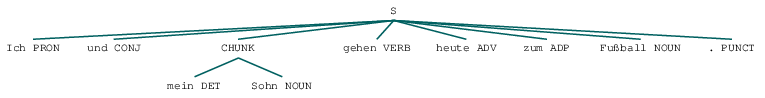

In [114]:
chunk_parser.parse(pos_tagged_sentences[3])

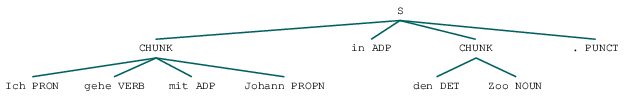

In [118]:
chunk_parser.parse(pos_tagged_sentences[4])

In [33]:
chunk_parser = nltk.RegexpParser(grammar)
chunk_parser.parse(pos_tagged_sentences[0])

parse_trees = []
for sentence in pos_tagged_sentences:
    #print(sentence)
    parse_trees.append(chunk_parser.parse(sentence))

parse_trees

[('Meine', 'DET'), ('kleine', 'ADJ'), ('Enkelin', 'NOUN'), ('Lisa', 'PROPN'), ('und', 'CONJ'), ('mein', 'DET'), ('Enkel', 'NOUN'), ('Lukas', 'PROPN'), ('fliegen', 'VERB'), ('morgen', 'ADV'), ('nach', 'ADP'), ('London', 'PROPN'), ('.', 'PUNCT')]
[('Sie', 'PRON'), ('sind', 'AUX'), ('zum', 'ADP'), ('ersten', 'ADJ'), ('Mal', 'NOUN'), ('in', 'ADP'), ('England', 'PROPN'), ('.', 'PUNCT')]
[('Peter', 'PROPN'), ('und', 'CONJ'), ('Maria', 'PROPN'), ('gehen', 'VERB'), ('morgen', 'ADV'), ('ins', 'ADP'), ('Kino', 'NOUN'), ('.', 'PUNCT')]
[('Ich', 'PRON'), ('und', 'CONJ'), ('mein', 'DET'), ('Sohn', 'NOUN'), ('gehen', 'VERB'), ('heute', 'ADV'), ('zum', 'ADP'), ('Fußball', 'NOUN'), ('.', 'PUNCT')]


[Tree('S', [('Meine', 'DET'), ('kleine', 'ADJ'), ('Enkelin', 'NOUN'), Tree('NP', [('Lisa', 'PROPN')]), ('und', 'CONJ'), ('mein', 'DET'), ('Enkel', 'NOUN'), Tree('NP', [('Lukas', 'PROPN')]), ('fliegen', 'VERB'), ('morgen', 'ADV'), ('nach', 'ADP'), Tree('NP', [('London', 'PROPN')]), ('.', 'PUNCT')]),
 Tree('S', [('Sie', 'PRON'), ('sind', 'AUX'), ('zum', 'ADP'), ('ersten', 'ADJ'), ('Mal', 'NOUN'), ('in', 'ADP'), Tree('NP', [('England', 'PROPN')]), ('.', 'PUNCT')]),
 Tree('S', [Tree('NP', [('Peter', 'PROPN')]), ('und', 'CONJ'), Tree('NP', [('Maria', 'PROPN')]), ('gehen', 'VERB'), ('morgen', 'ADV'), ('ins', 'ADP'), ('Kino', 'NOUN'), ('.', 'PUNCT')]),
 Tree('S', [('Ich', 'PRON'), ('und', 'CONJ'), ('mein', 'DET'), ('Sohn', 'NOUN'), ('gehen', 'VERB'), ('heute', 'ADV'), ('zum', 'ADP'), ('Fußball', 'NOUN'), ('.', 'PUNCT')])]

In [74]:
for tree in parse_trees:
    print(tree)

(S
  Meine/PPOSAT
  kleine/ADJA
  (CHUNK Enkelin/NN Lisa/NE)
  und/KON
  mein/PPOSAT
  (CHUNK Enkel/NN Lukas/NE)
  (CHUNK fliegen/VVFIN)
  morgen/ADV
  nach/APPR
  London/NE)


In [12]:
chunked_sentences = parse_trees[:1]
chunked_sentences

[Tree('S', [Tree('NP', [('Meine', 'PPOSAT'), ('Enkelin', 'NN')]), ('Lisa', 'NE'), ('und', 'KON'), Tree('NP', [('mein', 'PPOSAT'), ('Enkel', 'NN')]), ('Lukas', 'NE'), ('fliegen', 'VVFIN'), ('morgen', 'ADV'), Tree('NP', [('nach', 'APPR'), ('London', 'NE')])])]

## Chunk-Trees with IOB tags

each chunk token is taged with one of three IOB-tags: I (inside), O (outside) or B (begin)

* B: if token marks the beginning of a chunk
* I: subsequent tokens within the chunk
* O: all other tokens that not fall in the other two categories B or I

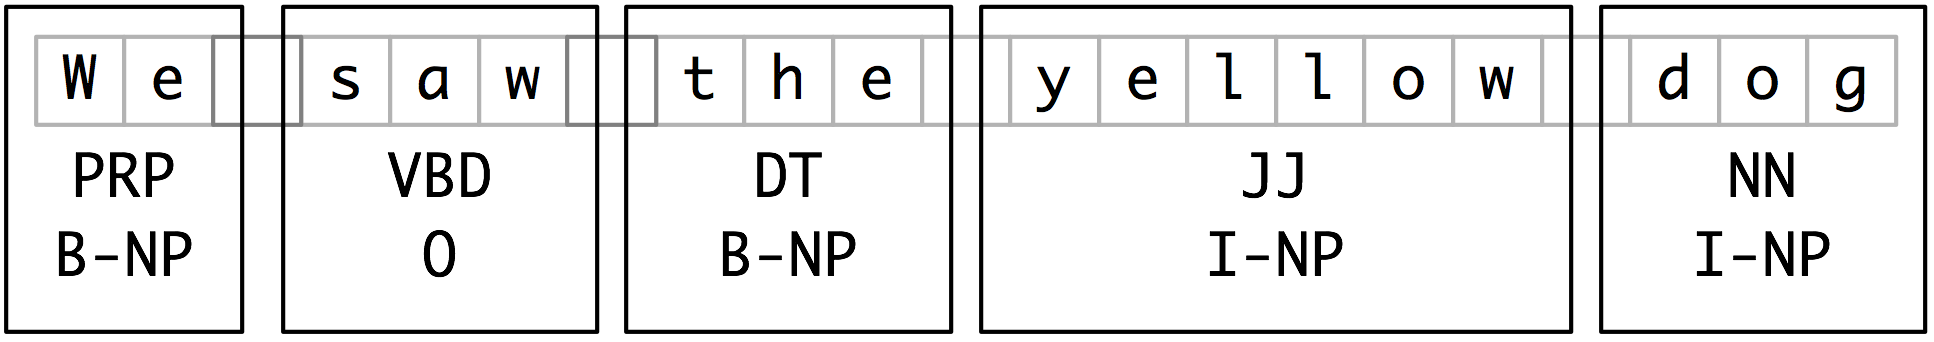

## Stanford Dependency Parser

In [34]:
from nltk.parse import stanford

path_to_jar = '../models/stanford-parser.jar'
path_to_models_jar = '../models/stanford-german-corenlp-models.jar'

dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

# GUI
for line in sentences:
    for sentence in line:
        sentence.draw()

LookupError: 

===========================================================================
  NLTK was unable to find stanford-parser-(\d+)(\.(\d+))+-models\.jar!
  Set the CLASSPATH environment variable.

  For more information, on stanford-parser-(\d+)(\.(\d+))+-models\.jar, see:
    <https://nlp.stanford.edu/software/lex-parser.shtml>
===========================================================================

### Tree Traversal

### Named entity recognition

In [162]:
from nltk.tag.stanford import StanfordNERTagger
model = '../models/dewac_175m_600.crf.ser.gz'
model = '../models/hgc_175m_600.crf.ser.gz'
#model = '../models/german.conll.germeval2014.hgc_175m_600.crf.ser.gz'
st = StanfordNERTagger(model,
                       '../models/stanford-ner.jar',
                      encoding='utf-8')

named_entities = []
for tree in parse_trees:
    for child in tree:
        print(child)
        #named_entities.append(st.tag(child[0].split()))

named_entities

c:\program files\python\lib\site-packages\nltk\tag\stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


(NP Meine/PPOSAT Enkelin/NN Lisa/NE)
('und', 'KON')
(NP mein/PPOSAT Enkel/NN Lukas/NE)
('fliegen', 'VVFIN')
('morgen', 'ADV')
(NP nach/APPR London/NE)
('Sie', 'PPER')
('sind', 'VAFIN')
('zum', 'APPRART')
('ersten', 'ADJA')
(NP Mal/NN in/APPR England/NE)
('Ich', 'PPER')
('bin', 'VAFIN')
('geboren', 'VVPP')
(NP zu/APPR York/NE)
('im', 'APPRART')
('Jahre', 'NN')
('1632', 'CARD')
('als', 'APPR')
('Kind', 'NN')
('angesehener', 'ADJA')
('Leute', 'NN')
('die', 'ART')
('ursprünglich', 'ADJD')
('nicht', 'PTKNEG')
('aus', 'APPR')
('jener', 'PDAT')
('Gegend', 'NN')
('stammten', 'VVFIN')
(NP Mein/PPOSAT Vater/NN)
('ein', 'ART')
(NP Ausländer/NN aus/APPR Bremen/NE)
('gebürtig', 'ADJD')
('hatte', 'VAFIN')
('sich', 'PRF')
('zuerst', 'ADV')
(NP in/APPR Hull/NE)
('niedergelassen', 'VVPP')
('war', 'VAFIN')
('dort', 'ADV')
('als', 'APPR')
('Kaufmann', 'NN')
('zu', 'APPR')
('hübschem', 'ADJA')
('Vermögen', 'NN')
('gekommen', 'VVPP')
('und', 'KON')
('dann', 'ADV')
('nachdem', 'KOUS')
('er', 'PPER')
(NP sei

[]

## Relation detection

In [90]:
IN = re.compile(r'.*')
for rel in nltk.sem.extract_rels('PER', 'LOC', chunked_sentences, pattern = IN):
    print(rel)
    print(nltk.sem.rtuple(rel))


---------------------------------------------------

In [37]:
people = set()
locations = set()
events = set()

for ent in doc.ents:
    #print("Entity: {}, Label: {}".format(ent, ent.label_))
    if ent.label_ == 'PER' or ent.label_ == 'PERSON':
        people.add(ent.text)
    elif ent.label_ == 'LOC':
        locations.add(ent.text)
    elif ent.label == 'EVENT':
        events.add(ent.text)
        
print("People: {}, Locations: {}, Events: {}".format(people, locations, events))

In [114]:
pos_tagged_sentences

[('Meine', 'DET'),
 ('Enkelin', 'PROPN'),
 ('Lisa', 'PROPN'),
 ('und', 'CONJ'),
 ('mein', 'DET'),
 ('Enkel', 'NOUN'),
 ('Lukas', 'PROPN'),
 ('fliegen', 'VERB'),
 ('morgen', 'ADV'),
 ('nach', 'ADP'),
 ('London', 'PROPN'),
 (' ', 'SPACE'),
 ('Sie', 'PRON'),
 ('sind', 'AUX'),
 ('zum', 'ADP'),
 ('ersten', 'ADJ'),
 ('Mal', 'NOUN'),
 ('in', 'ADP'),
 ('England', 'PROPN')]

In [95]:
nltk.download('ieer')
IN = re.compile(r'.*\bin\b(?!\b.+ing)')

[nltk_data] Downloading package ieer to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package ieer is already up-to-date!
<IEERDocument NYT19980315.0063: 'PUBLIC RADIO HOSTS DROP IN AND MAYBE STAY TOO LONG'>
<IEERDocument NYT19980315.0064: 'IN CYBERSPACE, IS THERE LAW WHERE THERE IS NO LAND?'>
<IEERDocument NYT19980315.0067: 'THE SITES: TUNING INTO MUSIC ON THE WEB'>
<IEERDocument NYT19980315.0069: 'ANALYSIS: TAXING INTERNET SALES _ GOVERNORS VS. TAX FREEDOM ACT'>
<IEERDocument NYT19980315.0070: 'A SEARCH ENGINE THAT CHARGES FOR TOP BILLING'>
<IEERDocument NYT19980315.0071: 'COMING SOON: TV DOCUMENTARIES TO A BOOKSTORE NEAR YOU'>
<IEERDocument NYT19980315.0072: 'WEATHER'>
<IEERDocument NYT19980315.0073: 'DICAPRIO , CHARISMATIC STAR, BALKS AT TEEN IDOL IMAGE'>
<IEERDocument NYT19980315.0074: "You've read the book? Now see the television program. Inspired by ``Angela's...">
<IEERDocument NYT19980315.0084: 'A DIRECTOR WHO DARES, AND TAKES THE HEAT'>
<IEERDocume

In [97]:
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    print(type(doc))
    for rel in nltk.sem.extract_rels('PER', 'LOC', doc, corpus='ieer', pattern = IN):
        #print(nltk.sem.rtuple(rel))

<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>


### Train word2vec model

In [27]:
import nltk
import re

training_sentences = []
with open('data/robinson_crusoe_section.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()
    sentences = nltk.sent_tokenize(raw_text)

for sentence in sentences:
    clean_sentence = re.sub('[.?!,]', '', sentence)
    tokenized_sentence = nltk.word_tokenize(sentence)    
    training_sentences.append(tokenized_sentence)

print(training_sentences)

[['Ich', 'bin', 'geboren', 'zu', 'York', 'im', 'Jahre', '1632', ',', 'als', 'Kind', 'angesehener', 'Leute', ',', 'die', 'ursprünglich', 'nicht', 'aus', 'jener', 'Gegend', 'stammten', '.'], ['Mein', 'Vater', ',', 'ein', 'Ausländer', ',', 'aus', 'Bremen', 'gebürtig', ',', 'hatte', 'sich', 'zuerst', 'in', 'Hull', 'niedergelassen', ',', 'war', 'dort', 'als', 'Kaufmann', 'zu', 'hübschem', 'Vermögen', 'gekommen', 'und', 'dann', ',', 'nachdem', 'er', 'sein', 'Geschäft', 'aufgegeben', 'hatte', ',', 'nach', 'York', 'gezogen', '.'], ['Hier', 'heirathete', 'er', 'meine', 'Mutter', ',', 'eine', 'geborene', 'Robinson', '.'], ['Nach', 'der', 'geachteten', 'Familie', ',', 'welcher', 'sie', 'angehörte', ',', 'wurde', 'ich', 'Robinson', 'Kreuznaer', 'genannt', '.'], ['In', 'England', 'aber', 'ist', 'es', 'Mode', ',', 'die', 'Worte', 'zu', 'verunstalten', ',', 'und', 'so', 'heißen', 'wir', 'jetzt', 'Crusoe', ',', 'nennen', 'und', 'schreiben', 'uns', 'sogar', 'selbst', 'so', ',', 'und', 'diesen', 'Namen'

In [28]:
model = Word2Vec(training_sentences, sg=1, size=100, window=5, min_count=5, workers=4)

### plot the model

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# fit model to 2D
X = model[model.wv.vocab]
pca = PCA(n_components=2)
print(X.shape)

result = pca.fit_transform(X)
print(result)

# scatter plot
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
print(words)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
#plt.savefig('wordvectors.png')
plt.show()
